# Day3 - HW01

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'國家': ['country_' + a for a in 'ABCDE'],
        '人口': np.random.randint(1000000, 100000000, 5)}
data = pd.DataFrame(data)

In [3]:
data

,國家,人口
0,country_A,75280927
1,country_B,21749318
2,country_C,7991589
3,country_D,81267939
4,country_E,80490432


In [4]:
print('The Country with most population is ' + data[data['人口'] == data['人口'].max()]['國家'].iloc[0])

The Country with most population is country_D


# Day3 - HW02

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [5]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [6]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [7]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [8]:
import pandas as pd

arrange_data = [l for l in [row.split('\t') for row in data]]
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

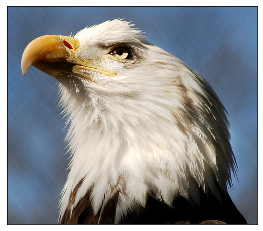

In [9]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)
plt.imshow(img)

plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])
    
plt.show()

In [10]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = list()
    for url in url_list:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
            img_list.append(img)
        except Exception:
            pass
        
    return img_list

Total images that we got: 4 


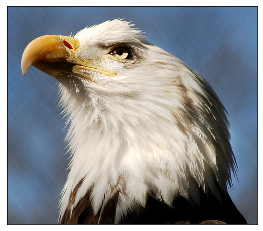

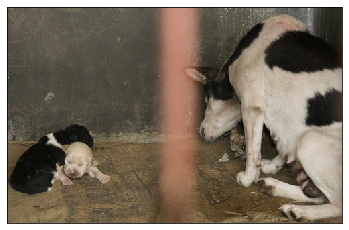

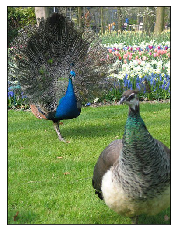

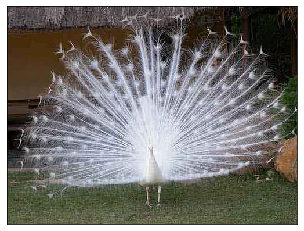

In [11]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    
    plt.tick_params(axis='both', which='both', length=0)
    plt.xticks([])
    plt.yticks([])

    plt.show()